# Machine Learning Project - IA mention CentraleSupélec

Under the supervision of :

- Myriam TAMI

Students:

- Lucas Tramonte

# Libraries


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

# EDA

In [3]:
data_original = pd.read_csv('Assets/Data/welddb.csv', delimiter='\s+', header=None)

In [4]:
data = data_original.copy()

# Name the columns
data.columns = [
    'Carbon concentration (weight%)', 
    'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 
    'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 
    'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 
    'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 
    'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 
    'Tungsten concentration (weight%)', 
    'Oxygen concentration (ppm by weight)', 
    'Titanium concentration (ppm by weight)', 
    'Nitrogen concentration (ppm by weight)', 
    'Aluminium concentration (ppm by weight)', 
    'Boron concentration (ppm by weight)', 
    'Niobium concentration (ppm by weight)', 
    'Tin concentration (ppm by weight)', 
    'Arsenic concentration (ppm by weight)', 
    'Antimony concentration (ppm by weight)', 
    'Current (A)', 
    'Voltage (V)', 
    'AC or DC', 
    'Electrode positive or negative', 
    'Heat input (kJ/mm)', 
    'Interpass temperature (°C)', 
    'Type of weld', 
    'Post weld heat treatment temperature (°C)', 
    'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 
    'Elongation (%)', 
    'Reduction of Area (%)', 
    'Charpy temperature (°C)', 
    'Charpy impact toughness (J)', 
    'Hardness (kg/mm2)', 
    '50% FATT', 
    'Primary ferrite in microstructure (%)', 
    'Ferrite with second phase (%)', 
    'Acicular ferrite (%)', 
    'Martensite (%)', 
    'Ferrite with carbide aggregate (%)', 
    'Weld ID'
]

data

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


Percentage of 'N' values in each column

In [5]:
percent_n = (data == 'N').mean() * 100
percent_n_sorted = percent_n.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")
percent_n_sorted

50% FATT                                     98.12%
Tungsten concentration (weight%)             95.46%
Ferrite with carbide aggregate (%)           94.61%
Martensite (%)                               94.61%
Ferrite with second phase (%)                94.55%
Acicular ferrite (%)                         94.55%
Primary ferrite in microstructure (%)        94.07%
Cobalt concentration (weight%)               92.19%
Hardness (kg/mm2)                            91.65%
Arsenic concentration (ppm by weight)        85.84%
Antimony concentration (ppm by weight)       84.26%
Tin concentration (ppm by weight)            82.08%
Boron concentration (ppm by weight)          69.49%
Copper concentration (weight%)               65.01%
Nickel concentration (weight%)               57.81%
Elongation (%)                               57.63%
Reduction of Area (%)                        57.32%
Ultimate tensile strength (MPa)              55.33%
Niobium concentration (ppm by weight)        54.48%
Yield streng

- The presence of an ``N'' indicates that the value was not reported in the publication. This is NOT meant to be an indication that the value is zero.

- It wouldn't make sense to set the phosphorus and sulfur concentrations to zero when their values aren't reported, because these impurity elements are inevitably present in welds in practice. 
    -   Therefore, we'll use the average values for these concentrations in such cases. 
    -   On the other hand, for other elements like manganese and nickel, it is reasonable to set their concentrations to zero if they are not reported. This is because they wouldn't be deliberate additions and their concentrations would be close to the detection limits of the commonly used analytical techniques [1].

In [6]:
# Replace 'N' with NaN
data.replace('N', pd.NA, inplace=True)

categoric_features = ['AC or DC', 'Electrode positive or negative','Type of weld'] # Weld ID isn't important
data_categoric = data[categoric_features] 

# Convert columns to numeric 
numeric_features = data.drop(columns = ['Weld ID','AC or DC', 'Electrode positive or negative','Type of weld']).columns
data_numeric = data[numeric_features].apply(pd.to_numeric, errors='coerce')

mean_phosphorus = data_numeric['Phosphorus concentration (weight%)'].dropna().astype(float).mean()
mean_sulphur = data_numeric['Sulphur concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
data_numeric['Phosphorus concentration (weight%)'] = data_numeric['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
data_numeric['Sulphur concentration (weight%)'] = data_numeric['Sulphur concentration (weight%)'].fillna(mean_sulphur)

# Replace NaNs with 0 for the other columns
data_numeric = data_numeric.fillna(0)
data_categoric = data_categoric.fillna(0)

data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].replace([0, '0'], '0')
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].astype("category")

# Concatenate dataframes

data_all = pd.concat([data_numeric, data_categoric], axis = 1)

Numeric features

In [7]:
# We need to remove the Charpy temperature (°C) and 50% FATT features
print("------------# of negative values : ------------ \n ")
print((data_numeric < 0).sum())

------------# of negative values : ------------ 
 
Carbon concentration (weight%)                 0
Silicon concentration (weight%)                0
Manganese concentration (weight%)              0
Sulphur concentration (weight%)                0
Phosphorus concentration (weight%)             0
Nickel concentration (weight%)                 0
Chromium concentration (weight%)               0
Molybdenum concentration (weight%)             0
Vanadium concentration (weight%)               0
Copper concentration (weight%)                 0
Cobalt concentration (weight%)                 0
Tungsten concentration (weight%)               0
Oxygen concentration (ppm by weight)           0
Titanium concentration (ppm by weight)         0
Nitrogen concentration (ppm by weight)         0
Aluminium concentration (ppm by weight)        0
Boron concentration (ppm by weight)            0
Niobium concentration (ppm by weight)          0
Tin concentration (ppm by weight)              0
Arsenic concentrat

In [8]:
data_numeric.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True)
data_numeric = data_numeric.drop_duplicates(keep='last') #9 duplicated rows

data_all.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True)
data_all = data_all.drop_duplicates(keep='last') #9 duplicated rows

# Reorder columns for better visualization
cols = data_numeric.columns.tolist()
cols.remove('Yield strength (MPa)')
cols.remove('Ultimate tensile strength (MPa)')

cols.append('Ultimate tensile strength (MPa)')
cols.append('Yield strength (MPa)')

data_numeric = data_numeric[cols]

# Summary
summary = pd.DataFrame({
    'Variable': data_numeric.columns,
    'Min': [data_numeric[col].min() for col in data_numeric.columns],
    'Max': [data_numeric[col].max() for col in data_numeric.columns],
    'Mean': [data_numeric[col].mean() for col in data_numeric.columns],
    'Standard Deviation': [data_numeric[col].std() for col in data_numeric.columns]
})

summary

,Variable,Min,Max,Mean,Standard Deviation
0,Carbon concentration (weight%),0.029,0.18,0.075806,0.023817
1,Silicon concentration (weight%),0.040,1.14,0.329785,0.112267
2,Manganese concentration (weight%),0.270,2.25,1.205151,0.382377
3,Sulphur concentration (weight%),0.001,0.14,0.009498,0.010814
4,Phosphorus concentration (weight%),0.002,0.25,0.012819,0.018822
5,Nickel concentration (weight%),0.000,3.50,0.176590,0.554808
6,Chromium concentration (weight%),0.000,10.20,0.996368,2.348730
7,Molybdenum concentration (weight%),0.000,1.50,0.225411,0.404342
8,Vanadium concentration (weight%),0.000,0.32,0.027266,0.068794
9,Copper concentration (weight%),0.000,1.63,0.061126,0.209431


array([[<Axes: title={'center': 'Carbon concentration (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration (weight%)'}>,
        <Axes: title={'center': 'Phosphorus concentration (weight%)'}>,
        <Axes: title={'center': 'Nickel concentration (weight%)'}>],
       [<Axes: title={'center': 'Chromium concentration (weight%)'}>,
        <Axes: title={'center': 'Molybdenum concentration (weight%)'}>,
        <Axes: title={'center': 'Vanadium concentration (weight%)'}>,
        <Axes: title={'center': 'Copper concentration (weight%)'}>,
        <Axes: title={'center': 'Cobalt concentration (weight%)'}>,
        <Axes: title={'center': 'Tungsten concentration (weight%)'}>],
       [<Axes: title={'center': 'Oxygen concentration (ppm by weight)'}>,
        <Axes: title={'center': 'Titanium concentration (ppm by weight)'}>,
        <Axes

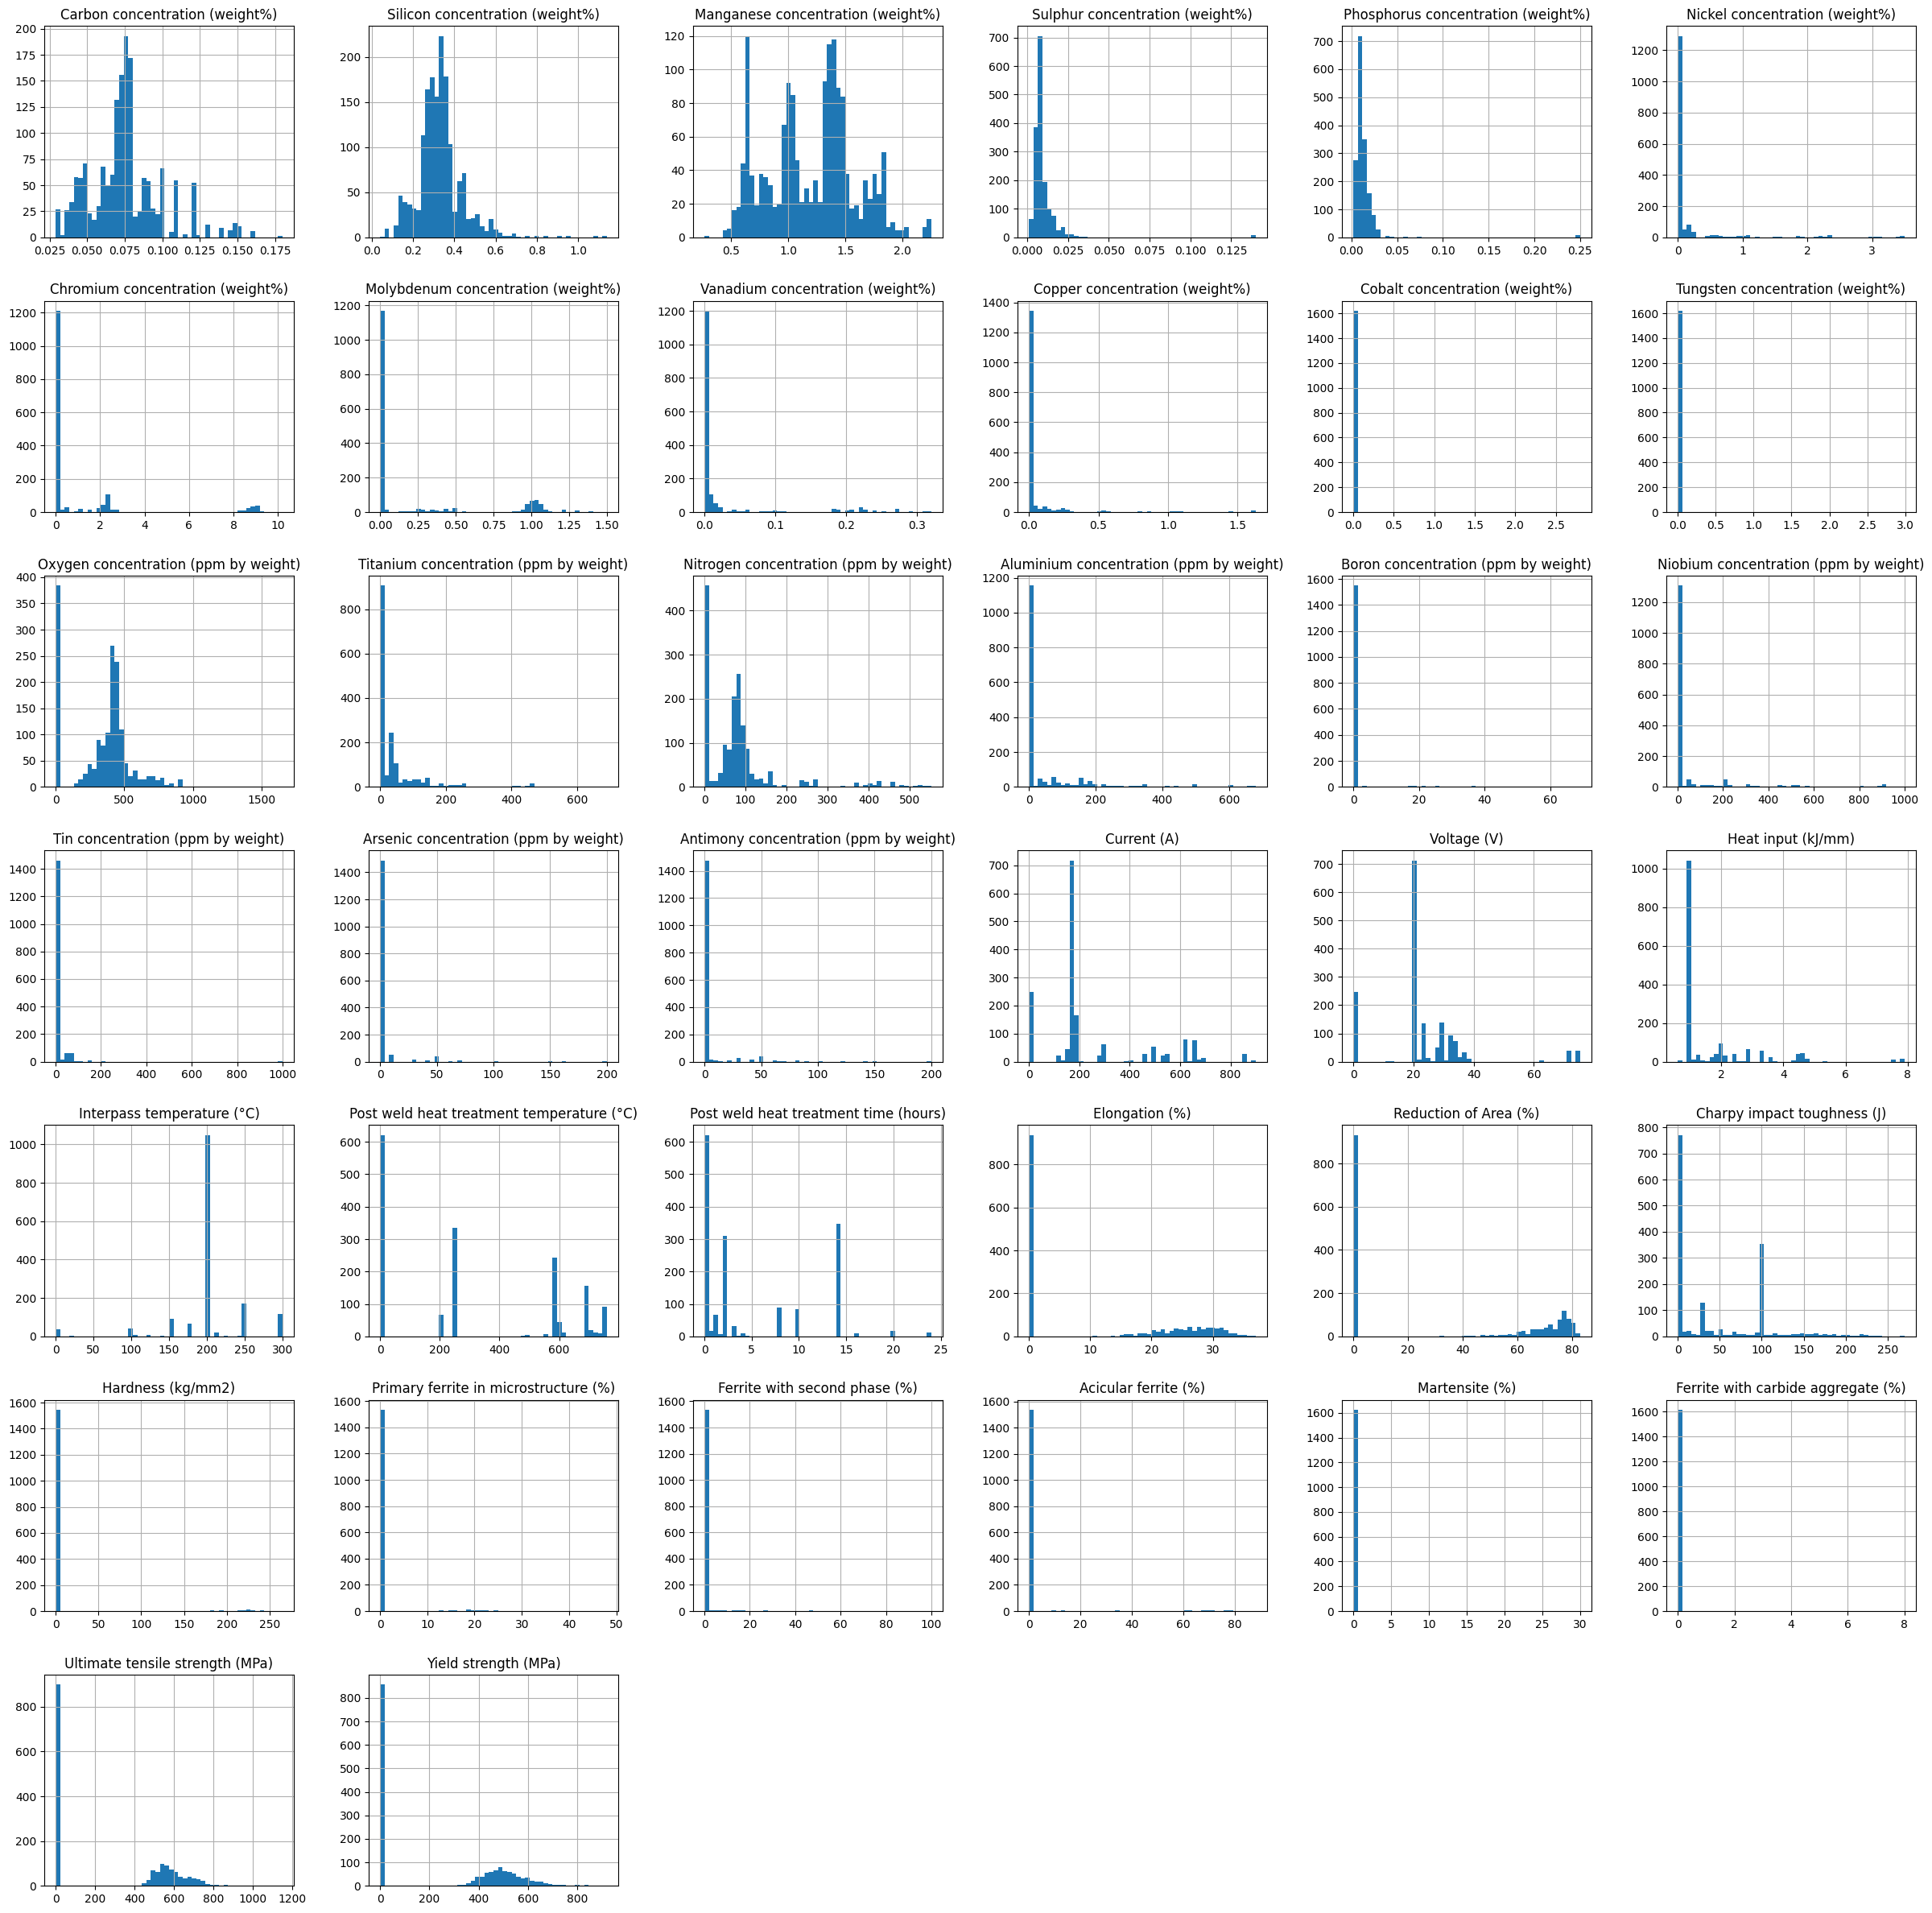

In [9]:
data_numeric.hist(bins = 50, figsize= (30,30))

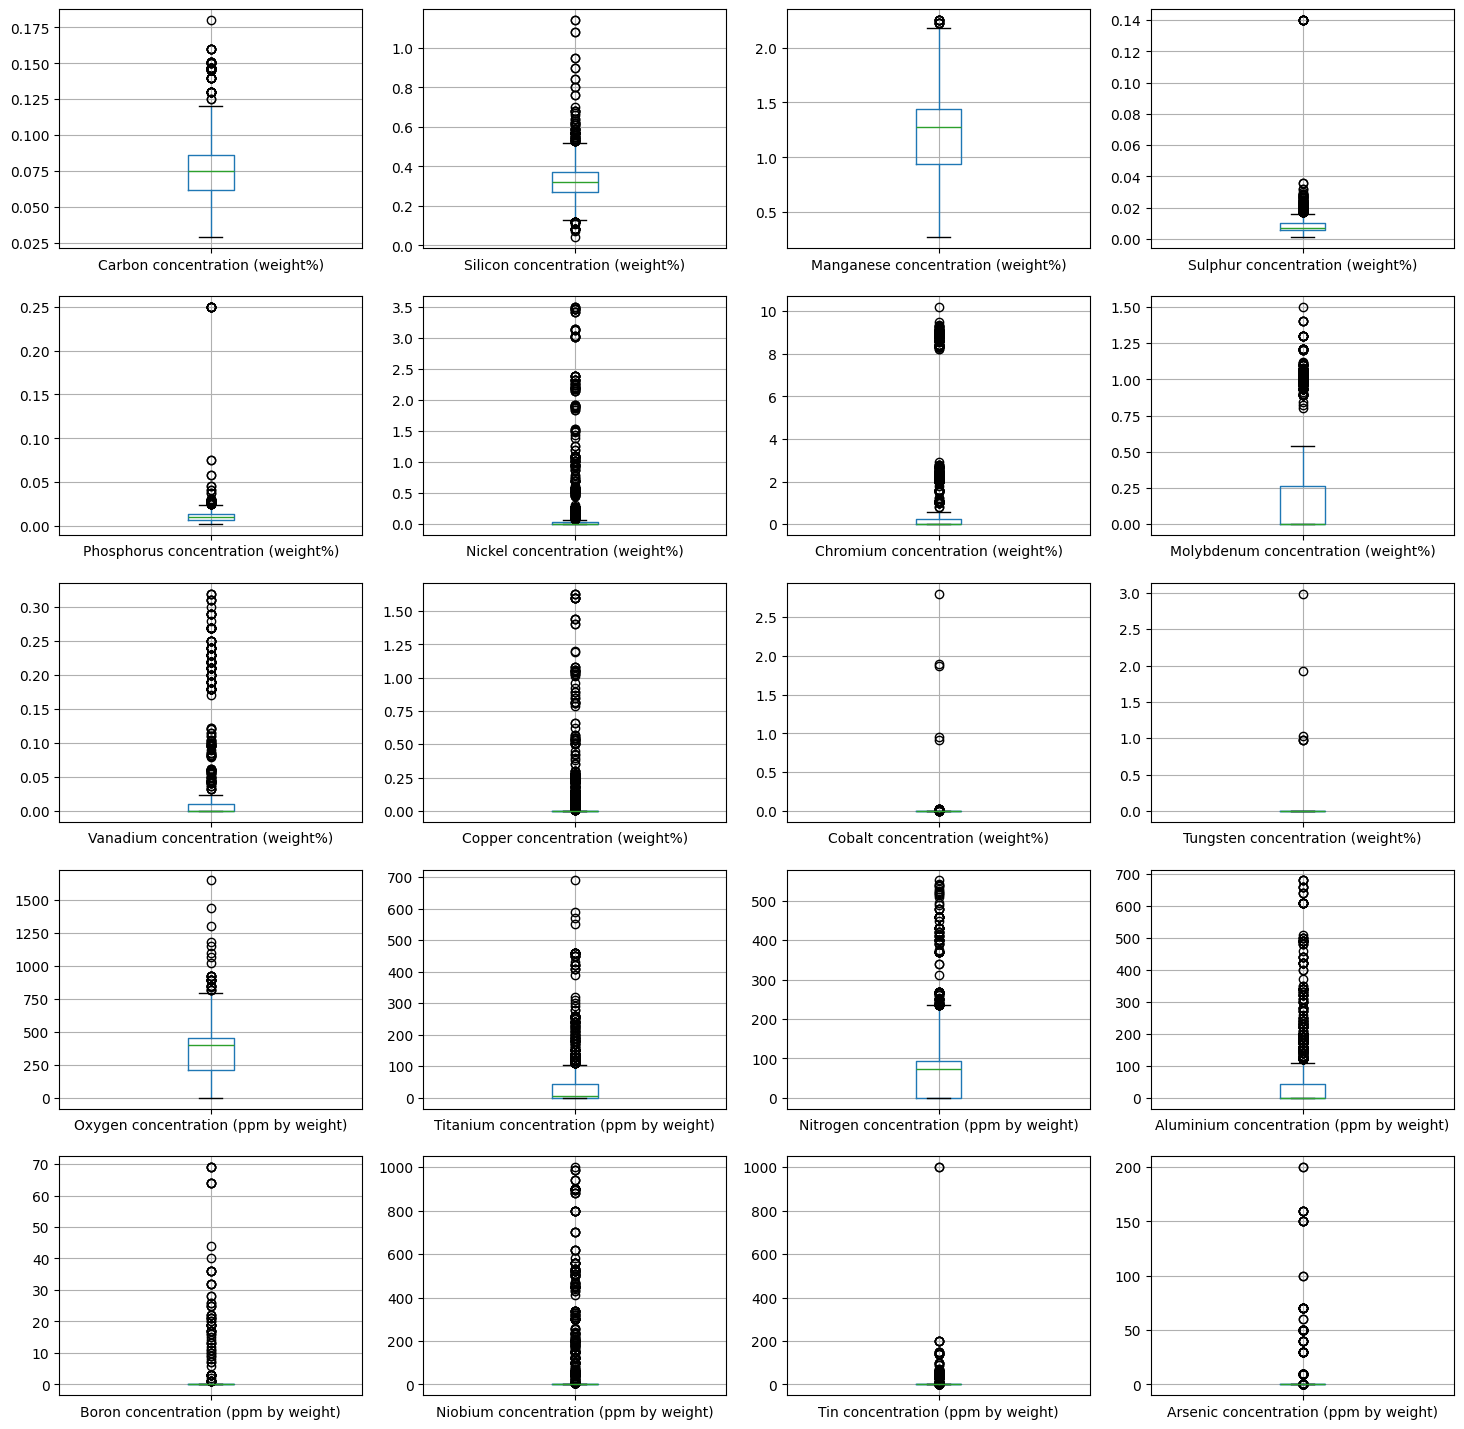

In [10]:
fig, axs = plt.subplots(5,4, figsize = (18,18))

for ax, col in zip(axs.flatten(), data_numeric.iloc[:,0:20].columns):
    data_numeric.iloc[:,0:20].boxplot(column = col, ax = ax)

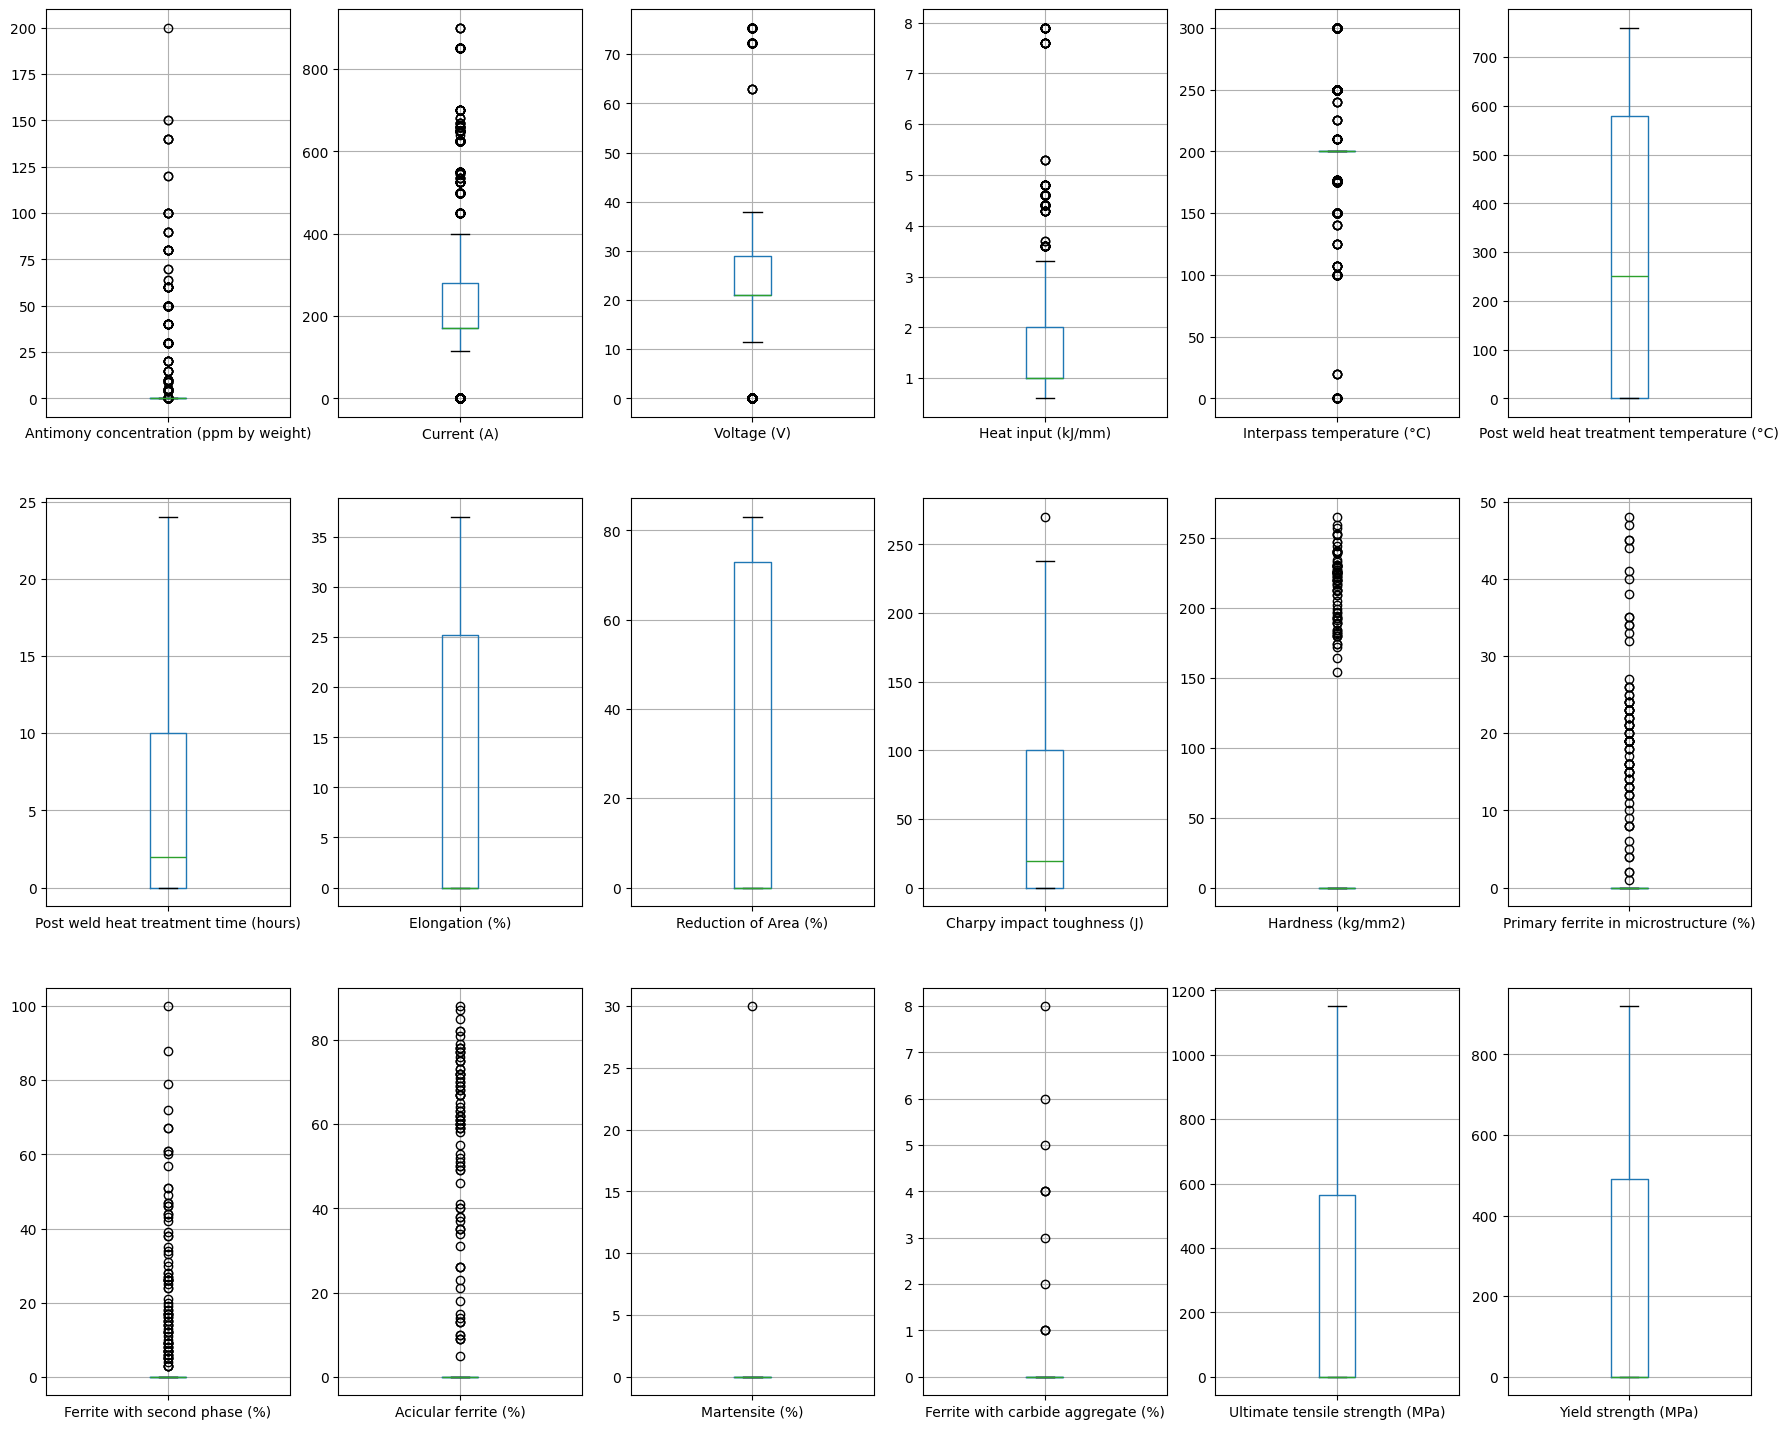

In [11]:
fig, axs = plt.subplots(3,6, figsize = (22,18))

for ax, col in zip(axs.flatten(), data_numeric.iloc[:,20::].columns):
    data_numeric.iloc[:,20::].boxplot(column = col, ax = ax)

In [12]:
data_numeric.corr().style.background_gradient(cmap="coolwarm")

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),Cobalt concentration (weight%),Tungsten concentration (weight%),Oxygen concentration (ppm by weight),Titanium concentration (ppm by weight),Nitrogen concentration (ppm by weight),Aluminium concentration (ppm by weight),Boron concentration (ppm by weight),Niobium concentration (ppm by weight),Tin concentration (ppm by weight),Arsenic concentration (ppm by weight),Antimony concentration (ppm by weight),Current (A),Voltage (V),Heat input (kJ/mm),Interpass temperature (°C),Post weld heat treatment temperature (°C),Post weld heat treatment time (hours),Elongation (%),Reduction of Area (%),Charpy impact toughness (J),Hardness (kg/mm2),Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Ultimate tensile strength (MPa),Yield strength (MPa)
Carbon concentration (weight%),1.000000,-0.099714,0.062329,0.033805,-0.004970,-0.188616,0.163612,0.144165,0.310152,-0.039956,0.037175,0.041645,-0.031164,-0.025244,0.147278,0.061749,0.034775,0.205194,0.061085,0.102167,0.064337,0.350131,0.205033,0.285685,0.182584,0.101021,-0.091282,-0.040365,-0.034002,-0.069770,-0.051766,-0.050438,-0.070358,-0.079233,-0.025853,-0.001554,-0.034032,0.004934
Silicon concentration (weight%),-0.099714,1.000000,0.192875,-0.050421,-0.039185,-0.075037,-0.161979,-0.279516,-0.213270,-0.069451,-0.072883,-0.067477,0.037882,0.310809,-0.142186,0.485025,-0.055368,-0.096155,0.029494,0.005938,0.031901,-0.038148,-0.078607,-0.112148,0.081173,-0.204592,-0.212653,0.044729,0.006886,-0.108412,0.009270,0.065659,0.036235,0.069191,0.006681,0.009322,0.075982,0.066819
Manganese concentration (weight%),0.062329,0.192875,1.000000,0.016231,0.038222,-0.081809,-0.269868,-0.324894,-0.158310,-0.038546,-0.031869,-0.027908,-0.056055,0.185654,-0.089459,0.124313,-0.027255,-0.115075,0.023606,0.017460,0.103553,0.101553,0.133076,0.084674,0.074824,-0.315793,-0.218663,0.007706,0.008505,-0.012329,-0.158325,-0.017616,-0.036479,0.074221,0.037966,-0.048415,0.015962,0.049935
Sulphur concentration (weight%),0.033805,-0.050421,0.016231,1.000000,0.936083,-0.009240,-0.022577,0.153164,0.073520,0.016398,-0.009204,-0.009144,0.065652,-0.074672,0.101844,-0.044419,-0.016150,-0.073302,0.032118,-0.002009,0.046647,0.203146,0.209567,0.245946,0.046168,0.049736,-0.025137,-0.003235,-0.013894,-0.057578,0.108261,-0.067606,-0.050559,-0.067826,-0.005734,-0.015129,0.028289,0.037769
Phosphorus concentration (weight%),-0.004970,-0.039185,0.038222,0.936083,1.000000,0.016639,0.036049,0.165552,0.147510,0.002188,0.006210,0.006278,0.010494,-0.088119,0.156748,-0.009067,0.001714,-0.034572,0.092132,0.008535,0.075921,0.146479,0.144927,0.178785,-0.033897,0.069634,-0.018022,-0.001680,-0.016387,-0.070551,0.093571,-0.056735,-0.043115,-0.054303,0.000238,-0.024607,0.010161,0.038791
Nickel concentration (weight%),-0.188616,-0.075037,-0.081809,-0.009240,0.016639,1.000000,0.025912,-0.001791,0.007595,0.070201,-0.016196,-0.007211,-0.079894,-0.058641,-0.012072,-0.078925,0.027770,-0.001095,-0.044516,-0.046416,-0.050083,-0.071898,-0.113613,-0.031914,-0.122044,0.003265,0.091337,0.031675,0.003748,-0.050918,0.052648,-0.039024,0.006322,-0.005339,0.145111,-0.022462,0.071558,0.110972
Chromium concentration (weight%),0.163612,-0.161979,-0.269868,-0.022577,0.036049,0.025912,1.000000,0.721542,0.803365,-0.086342,0.190323,0.189458,0.207425,-0.201287,0.714314,-0.157125,0.302847,0.622717,-0.049227,0.006992,-0.101769,-0.017729,0.097325,-0.089316,-0.399025,0.530248,0.128727,-0.164298,-0.143011,-0.133324,0.011208,-0.077975,-0.061432,-0.087732,-0.010530,-0.029937,-0.067729,-0.050088
Molybdenum concentration (weight%),0.144165,-0.279516,-0.324894,0.153164,0.165552,-0.00179

- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.
- Elongation (%) and Reduction of Area (%) are highly correlated, then we must keep only one of them.
- Reduction of Area (%) are highly correlated with the target variables Yield strenght and Ultimate tensile strenght, then we must keep it on the prediction!!
- Yield strenght and Ultimate tensile strenght are highly correlated, then we should keep the Yield strenght on the prediction of the Ultimate tensile strenght !!

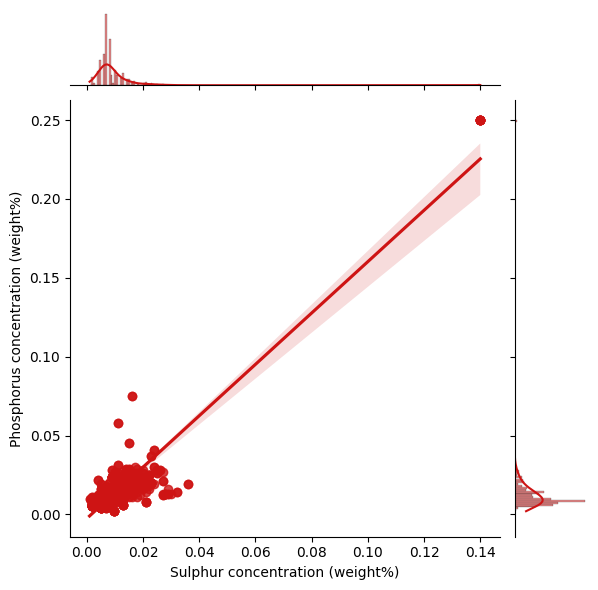

In [13]:
sns.jointplot(data = data_numeric, x = "Sulphur concentration (weight%)",y = "Phosphorus concentration (weight%)", kind="reg", color="#ce1414")

An outlier was visually identified in these two variables, so it was analyzed whether removing this outlier would have a direct impact on the correlation between the two variables. After removal, it was found that the variables are still correlated

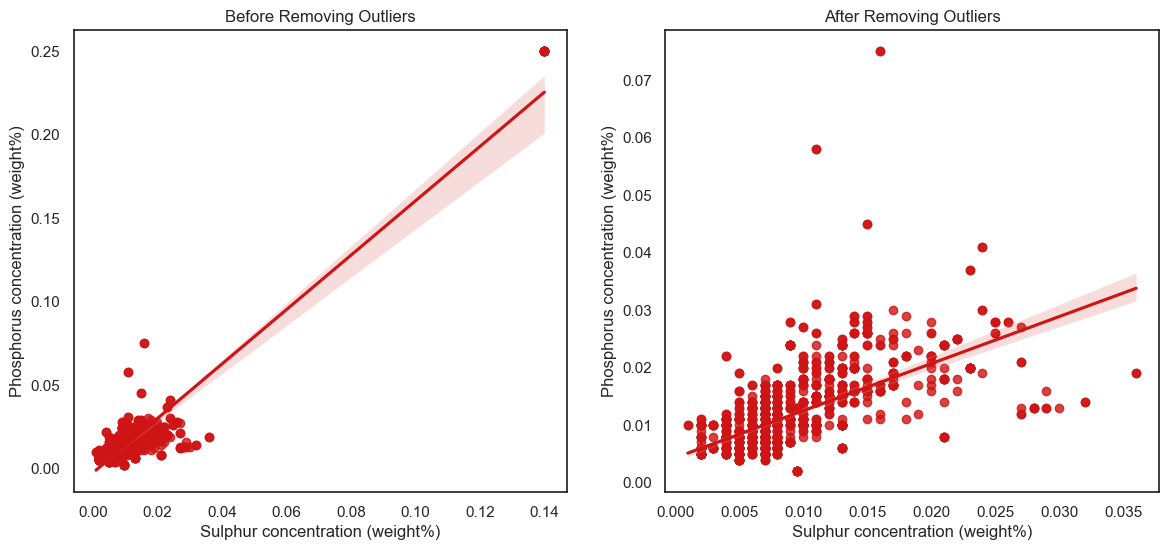

In [101]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.regplot(data = data_numeric, x = "Sulphur concentration (weight%)",y = "Phosphorus concentration (weight%)", color="#ce1414")
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2) 
sns.regplot(data = data_numeric[(data_numeric["Sulphur concentration (weight%)"] <= 0.12)&(data_numeric["Phosphorus concentration (weight%)"] <= 0.20)], x = "Sulphur concentration (weight%)",y = "Phosphorus concentration (weight%)", color="#ce1414")
plt.title("After Removing Outliers")

plt.show()

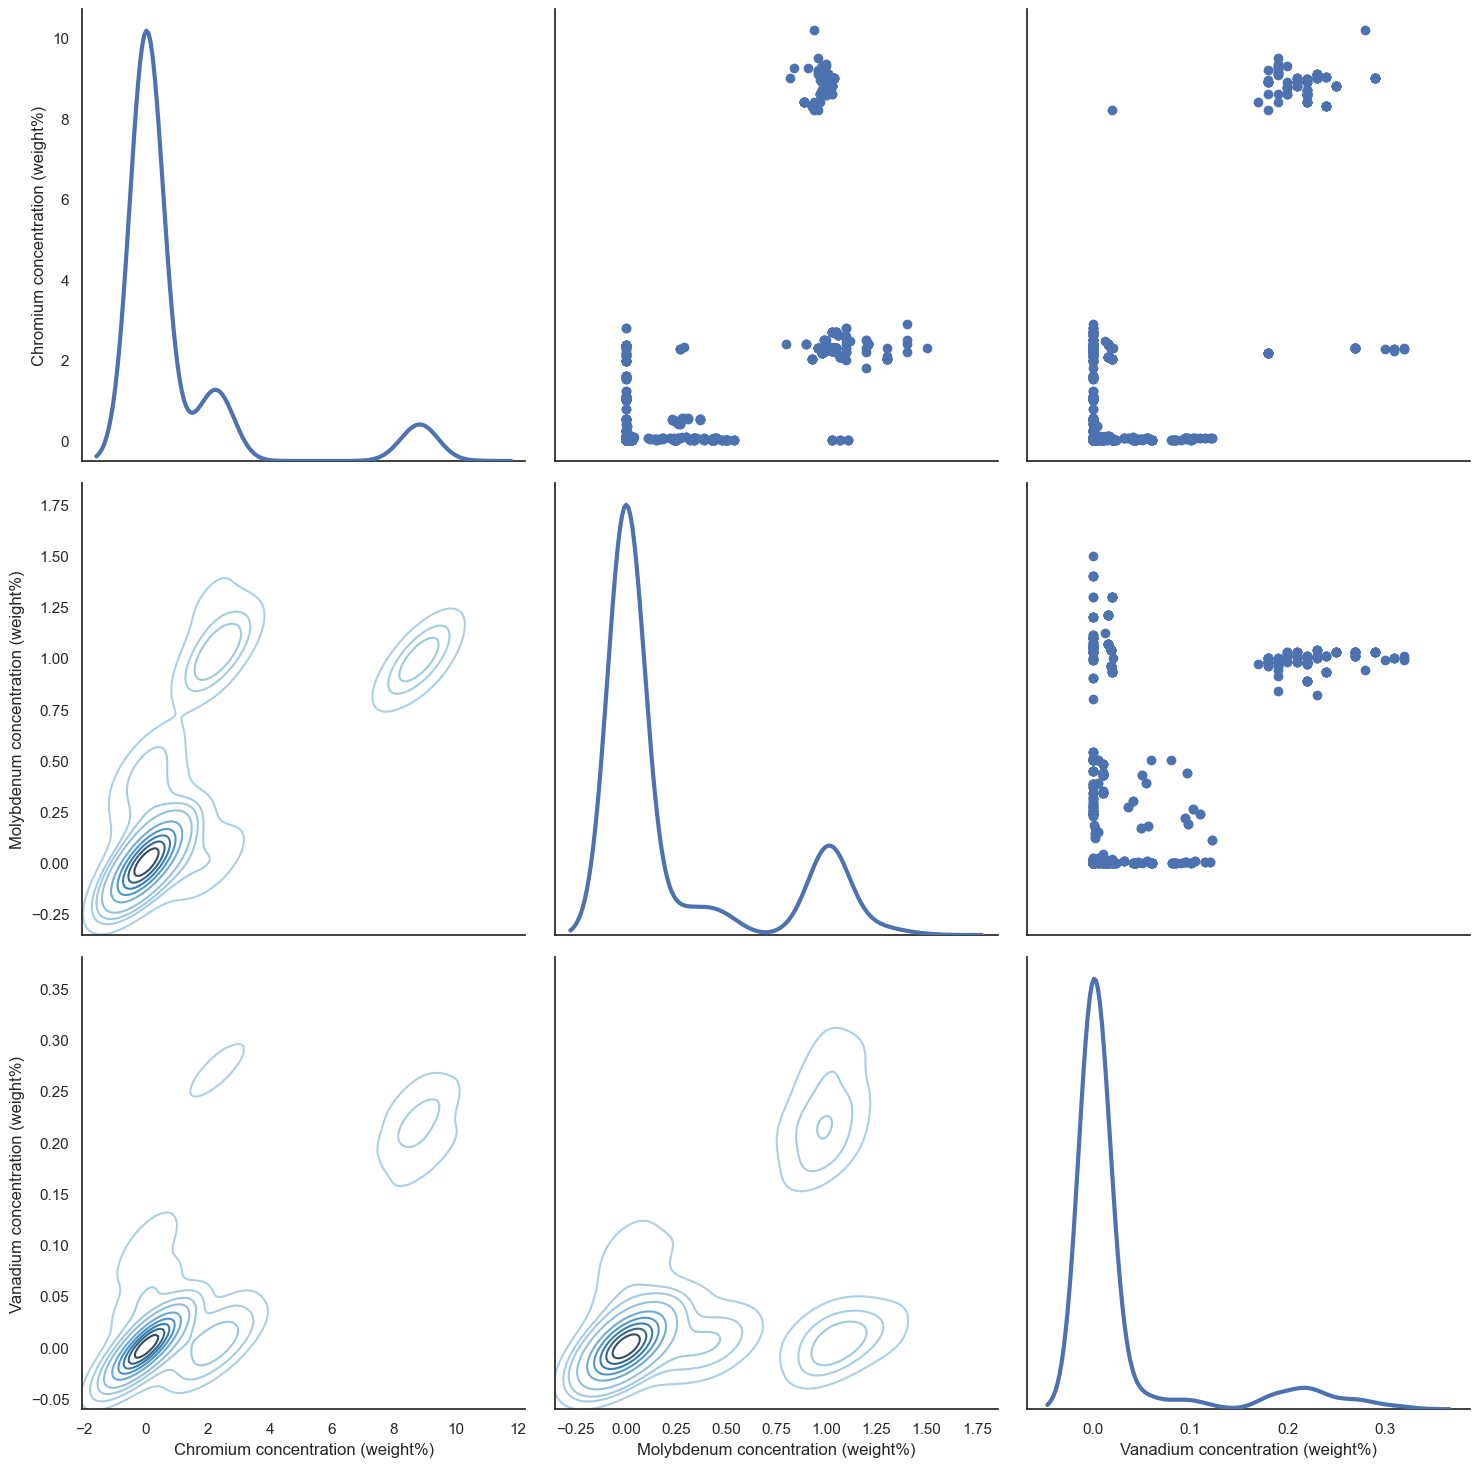

In [14]:
sns.set(style="white")
g = sns.PairGrid(data_numeric.loc[:,['Chromium concentration (weight%)','Molybdenum concentration (weight%)','Vanadium concentration (weight%)']], diag_sharey=False, height=5, aspect=1)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

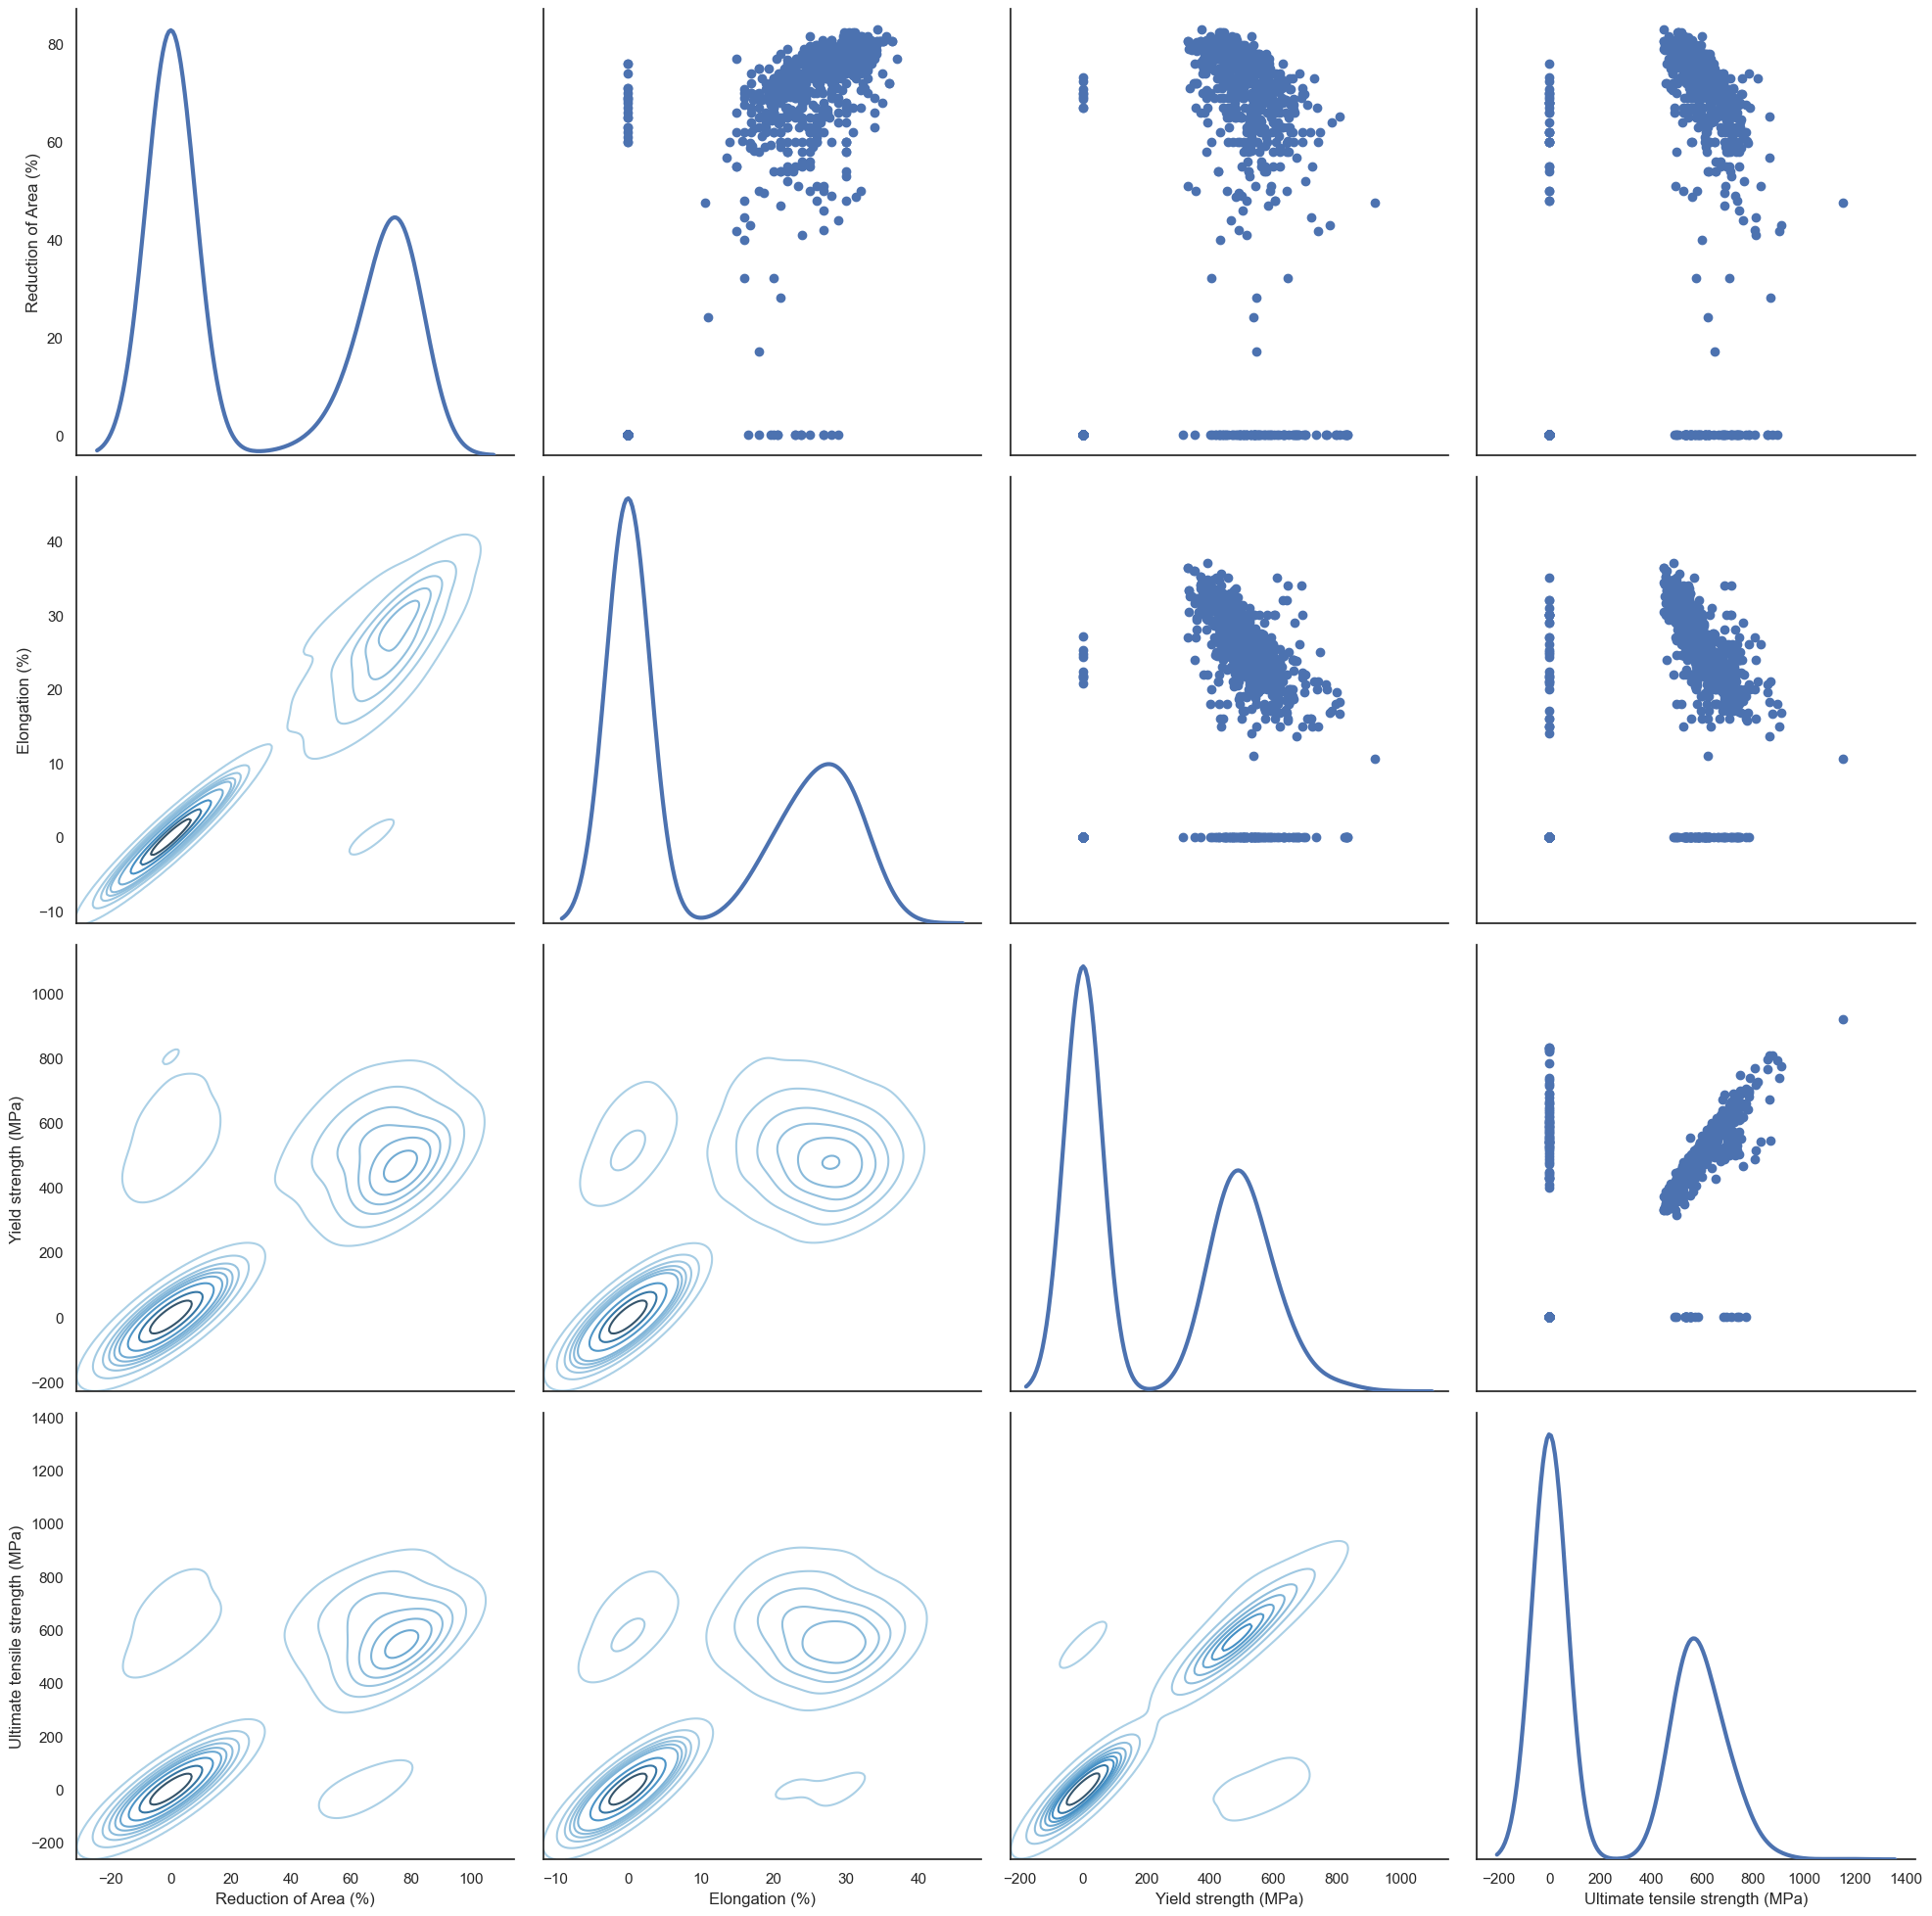

In [15]:
sns.set(style="white")
g = sns.PairGrid(data_numeric.loc[:,['Reduction of Area (%)','Elongation (%)','Yield strength (MPa)', 'Ultimate tensile strength (MPa)']], diag_sharey=False, height=5, aspect=1)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Remove Outliers with IQR

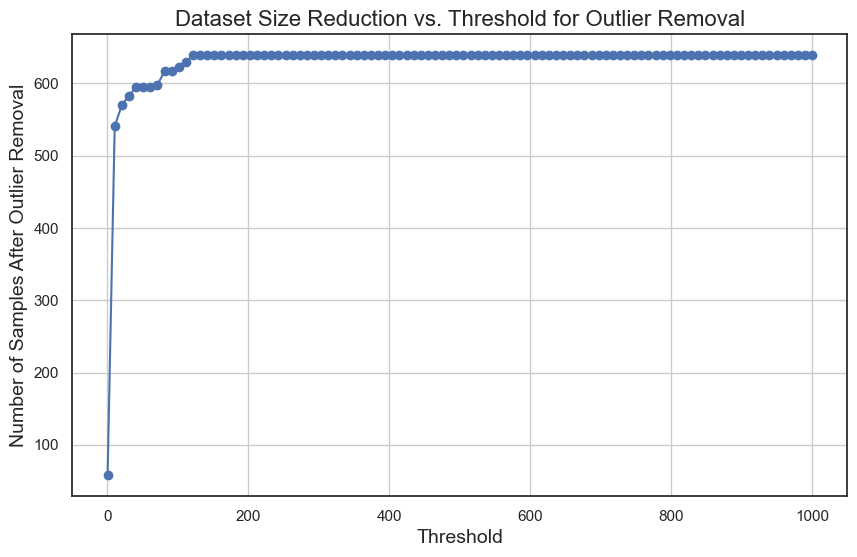

Original dataset size: 1625


In [85]:
def remove_outliers_iqr(df, threshold=3):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_clean

data_clean = remove_outliers_iqr(data_numeric)

original_size = data_numeric.shape[0]

thresholds = np.linspace(0.5, 1000, 100) 
dataset_sizes = []

for t in thresholds:
    data_clean = remove_outliers_iqr(data_numeric, threshold=t)
    dataset_sizes.append(data_clean.shape[0])

plt.figure(figsize=(10, 6))
plt.plot(thresholds, dataset_sizes, marker='o', linestyle='-', color='b')
plt.title('Dataset Size Reduction vs. Threshold for Outlier Removal', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Number of Samples After Outlier Removal', fontsize=14)
plt.grid(True)
plt.show()

print("Original dataset size:", original_size)


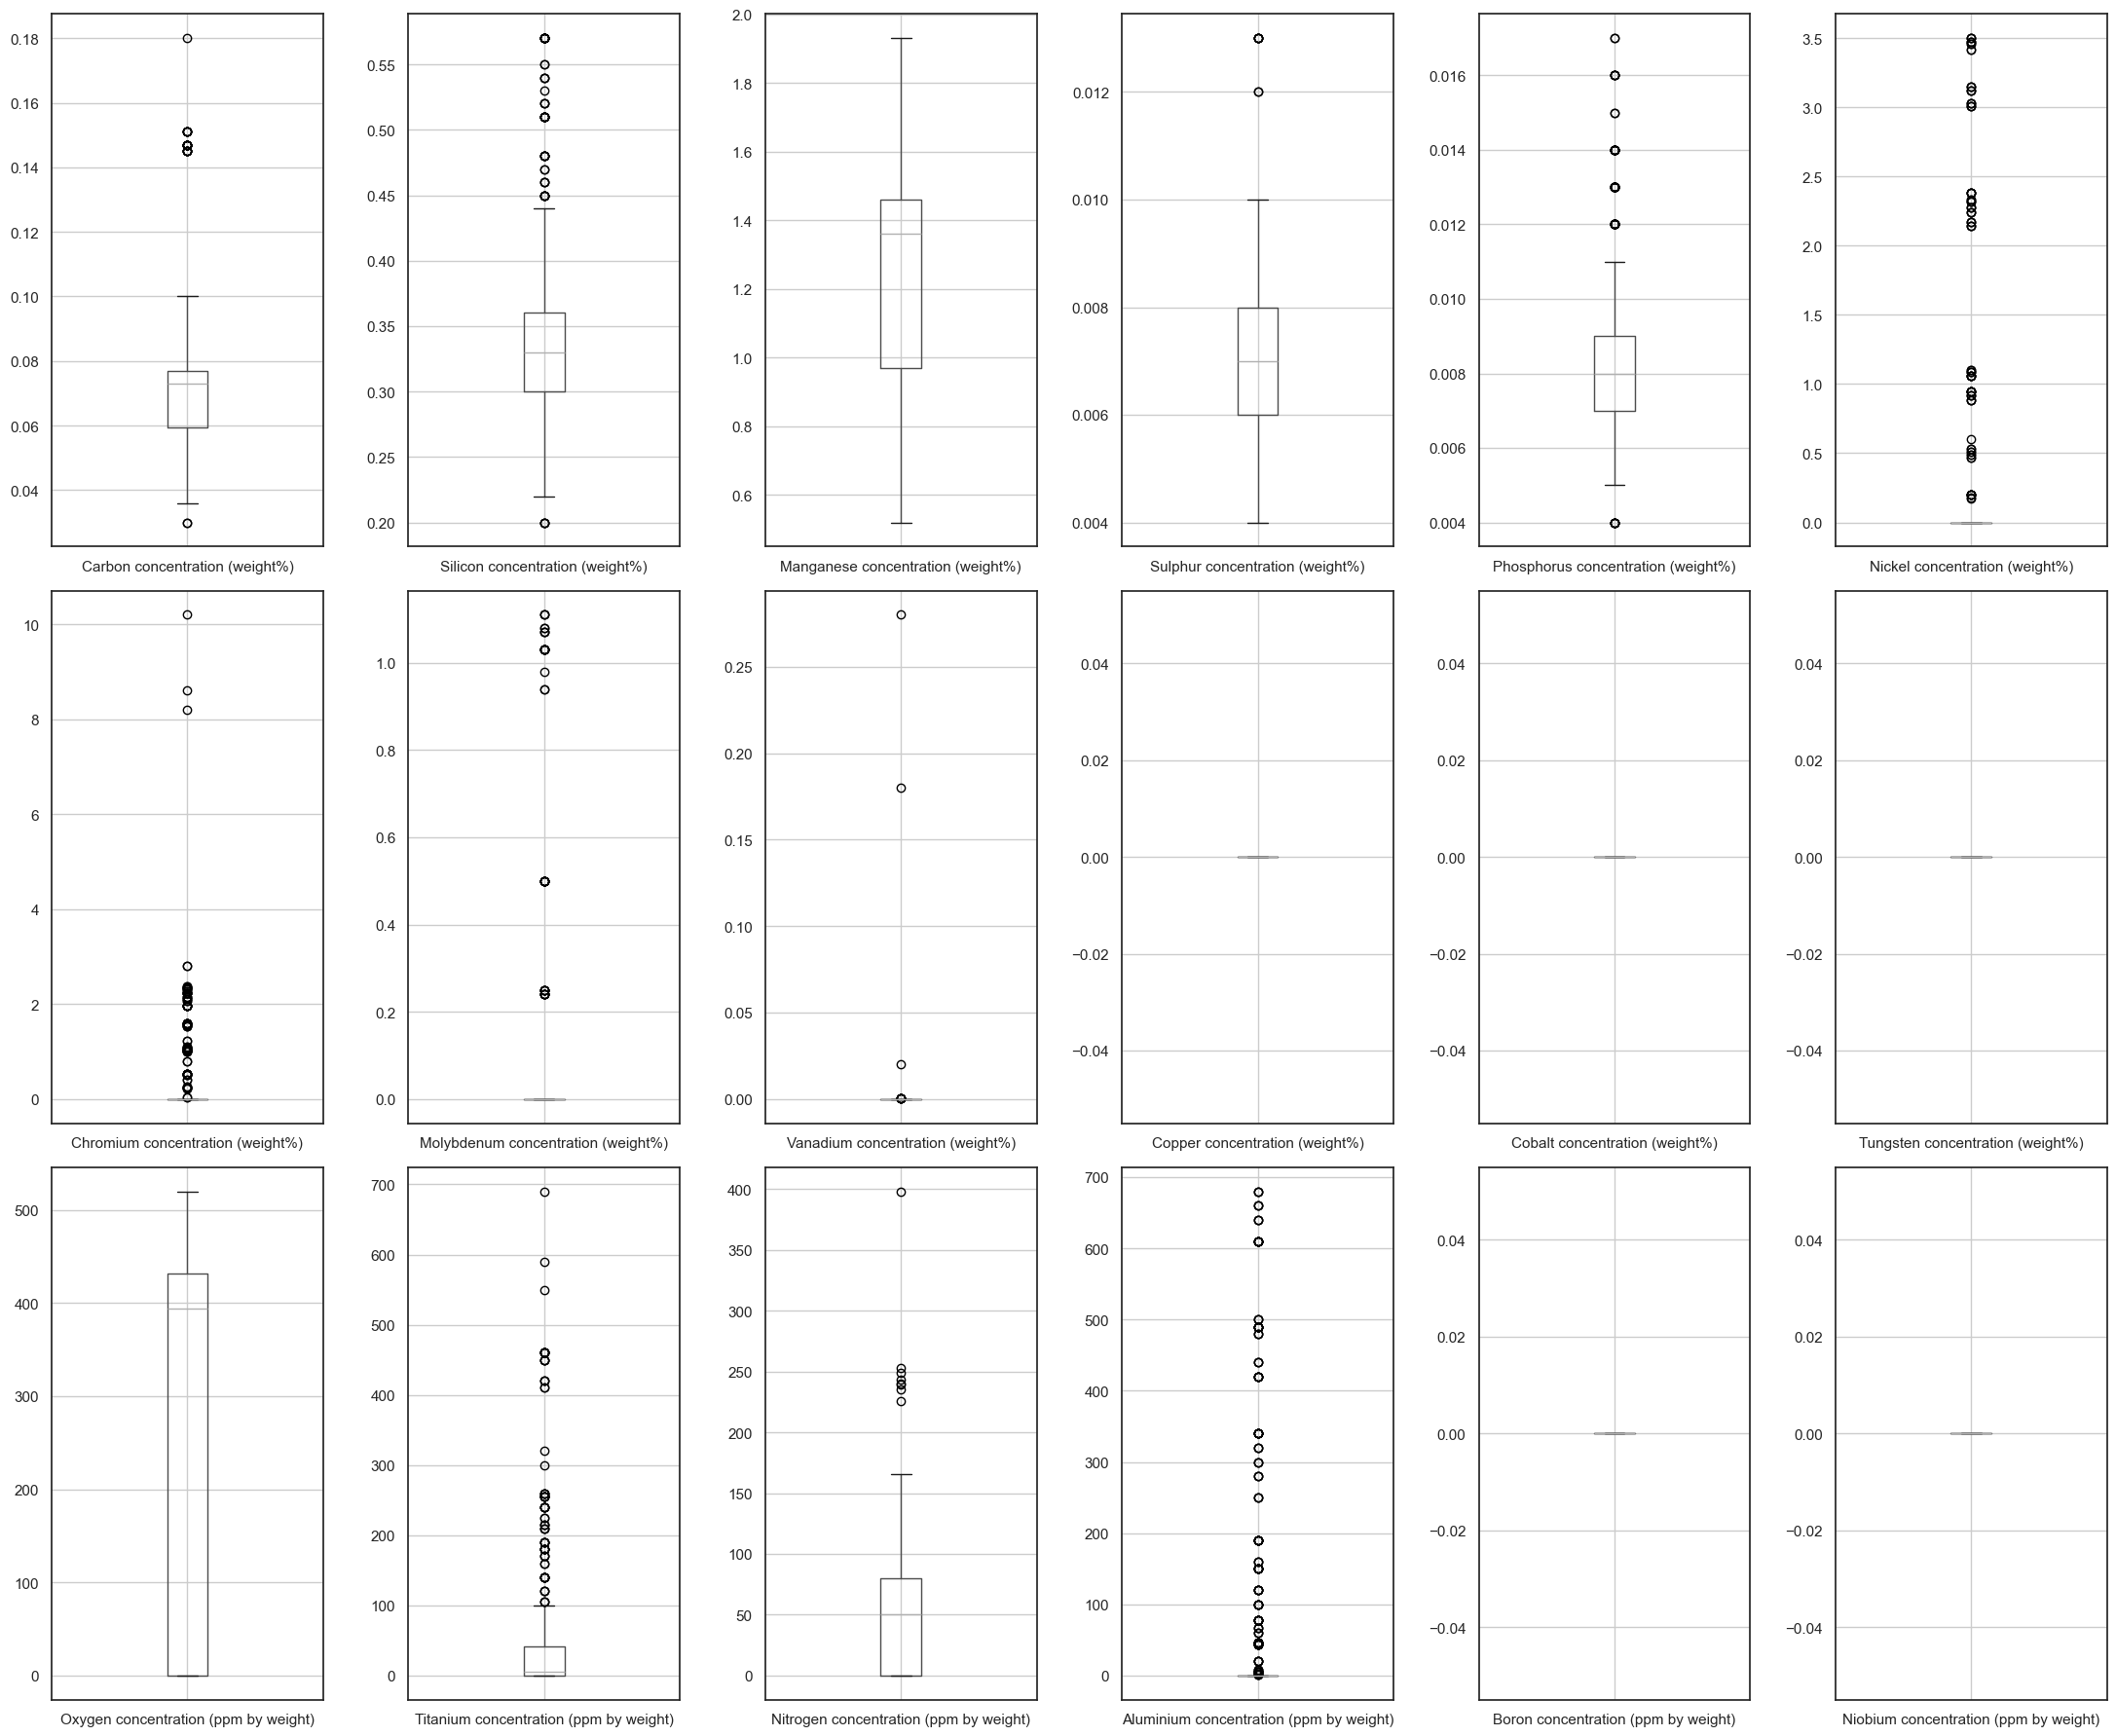

In [86]:
fig, axs = plt.subplots(3, 6, figsize=(22, 18))

for ax, col in zip(axs.flatten(), data_clean.iloc[:,0:20].columns):
    data_clean.boxplot(column=col, ax=ax)

plt.tight_layout()
plt.show()

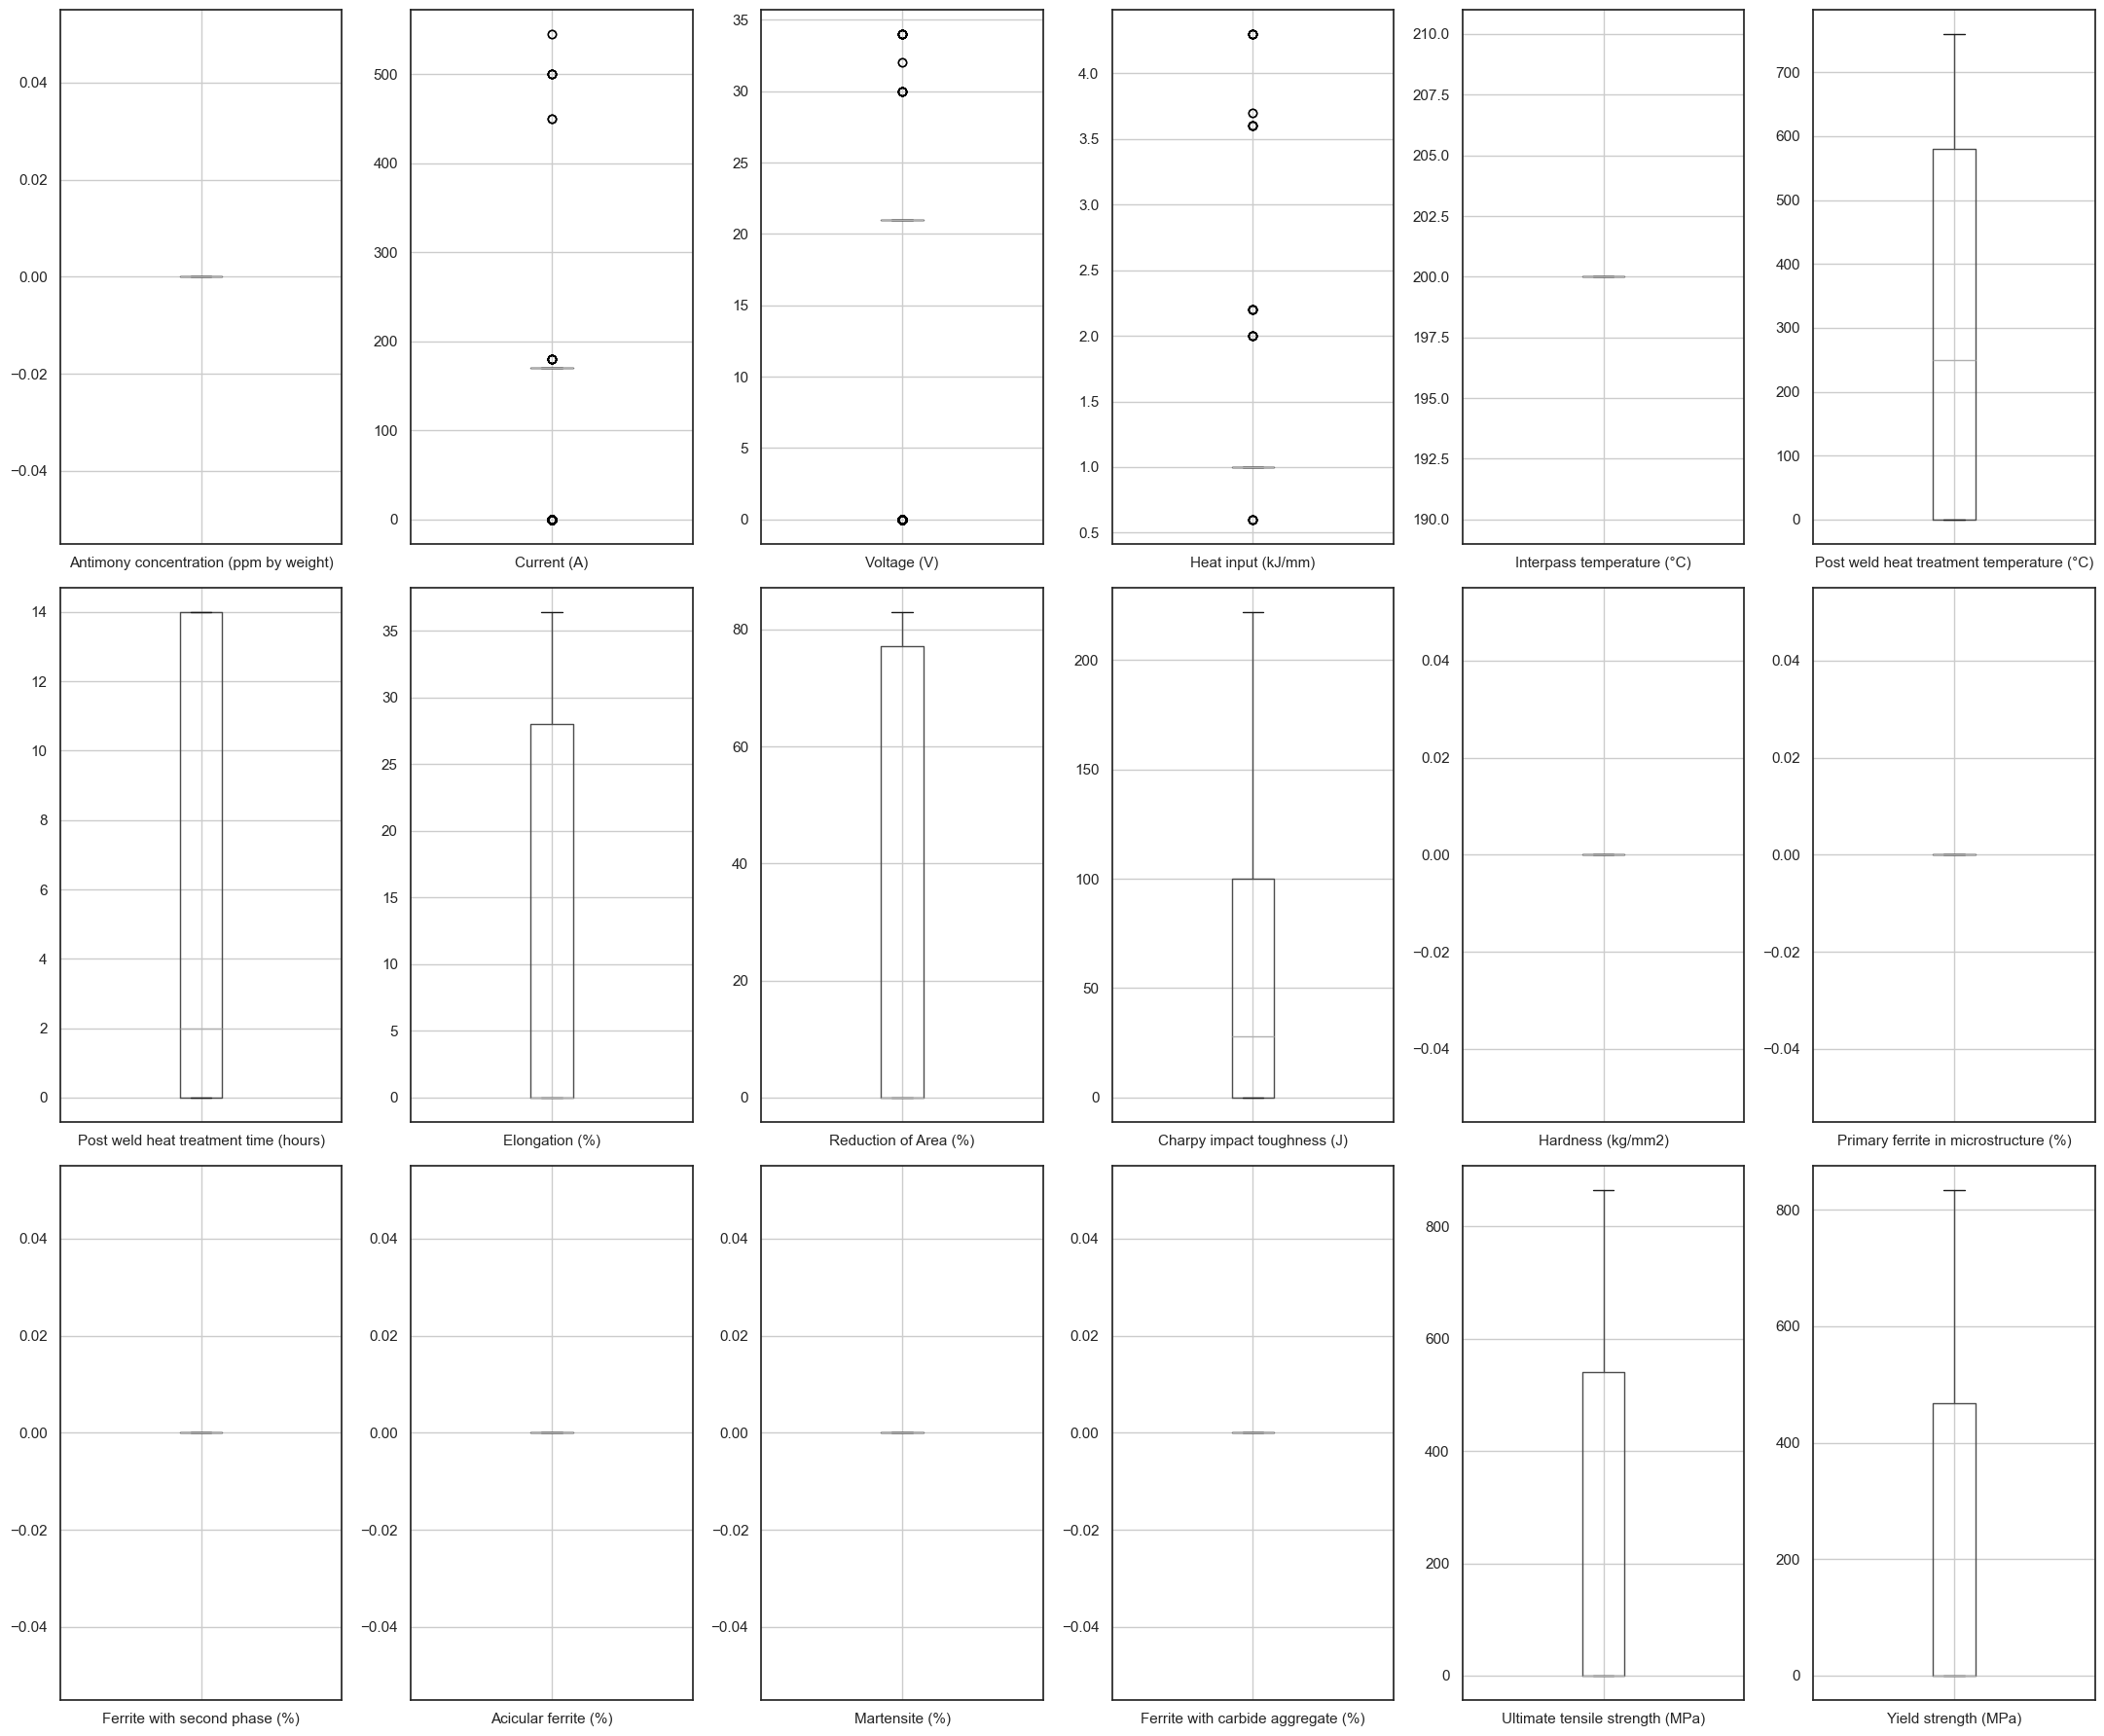

In [87]:
fig, axs = plt.subplots(3, 6, figsize=(22, 18))

for ax, col in zip(axs.flatten(), data_clean.iloc[:, 20::].columns):
    data_clean.boxplot(column=col, ax=ax)

plt.tight_layout()
plt.show()

We can see that after removing outliers with IQR, more than half of the dataset has been removed. Given that we have many columns and little data, it is not interesting to remove outliers, especially since it is not clear what they are. 

- For example, is a concentration of 0.14 sulfur and 0.25 phosphorus really impossible? Given that it is feasible, the strategy adopted will be to keep the outliers.

Categoric features

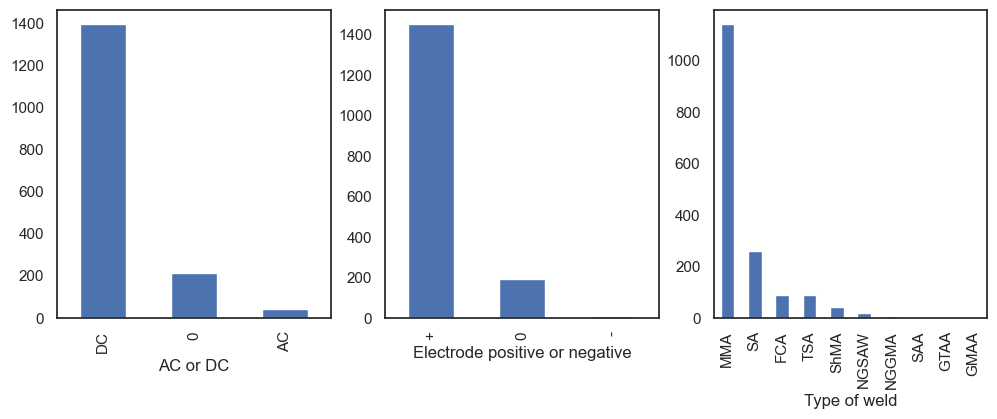

In [16]:
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].replace([0, '0'], '0')
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].astype("category")

fig, axs = plt.subplots(1, 3, figsize = (12,4))

for ax, col in zip(axs.flatten(), categoric_features):
    data_categoric[col].value_counts().plot(ax = ax, kind = 'bar')
    
plt.tight_layout
plt.show()

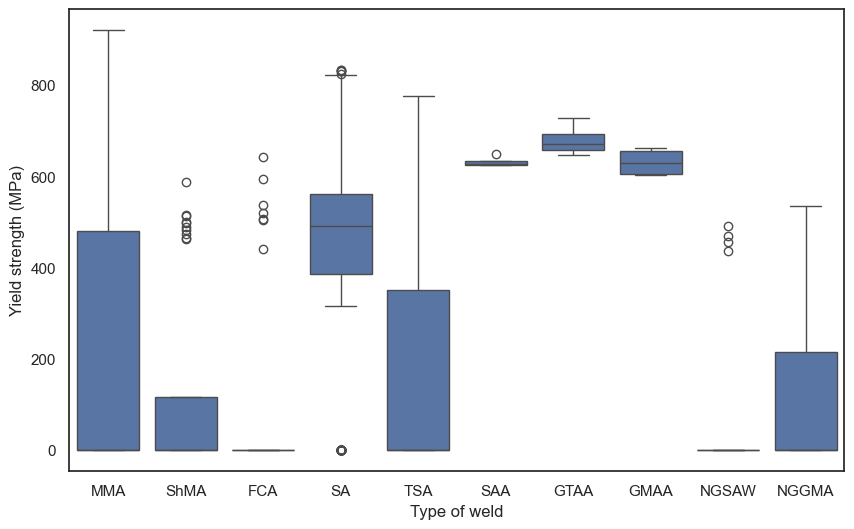

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data_all, x = "Type of weld", y = "Yield strength (MPa)")
plt.show()

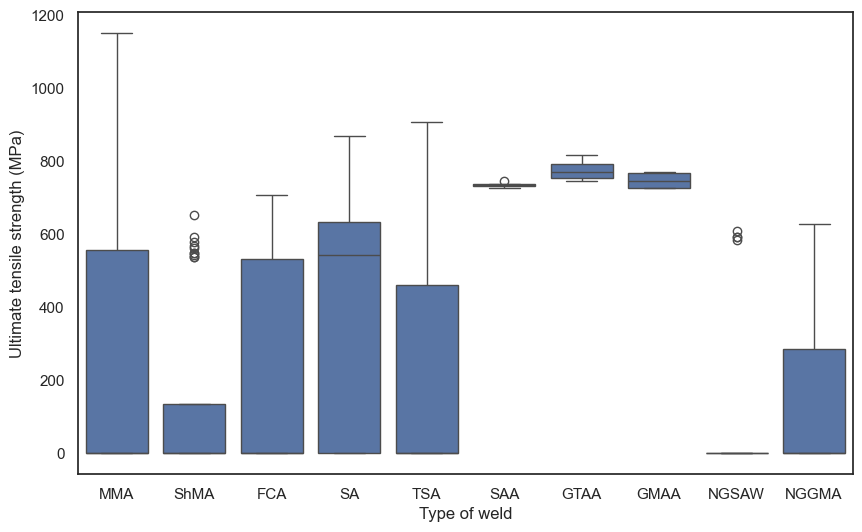

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data_all, x = "Type of weld", y = "Ultimate tensile strength (MPa)")
plt.show()